<a href="https://colab.research.google.com/github/FrancoPalavicinoG/cellia/blob/main/notebooks/02_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load DF from Google Drive

Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load Dataframes

In [3]:
input_path = "/content/drive/MyDrive/cellia_drive/Datasets/"

df_demo = pd.read_excel(input_path + "demographics.xlsx")
df_exam = pd.read_excel(input_path + "examination.xlsx")
df_lab = pd.read_excel(input_path + "labs.xlsx")
df_quest = pd.read_excel(input_path + "questionnaire.xlsx")

In [4]:
print("Demographics shape:", df_demo.shape)
print("Examination shape:", df_exam.shape)
print("Labs shape:", df_lab.shape)
print("Questionnaire shape:", df_quest.shape)

Demographics shape: (10175, 5)
Examination shape: (9813, 5)
Labs shape: (9813, 15)
Questionnaire shape: (10175, 15)


### DF examples

In [5]:
def data_example(df, name, n=5):
    print(f"\n{name} – Data examples:")
    display(df.head(n))

In [6]:
dfs = {
    "Demographic": df_demo,
    "Examination": df_exam,
    "Labs": df_lab,
    "Questionnaire": df_quest
}

In [7]:
for name, df in dfs.items():
    data_example(df, name)


Demographic – Data examples:


,SEQN,GENDER,AGE_MONTHS_1,AGE_YEARS,AGE_MONTHS_2
0,73557,1,NaN,69,NaN
1,73558,1,NaN,54,NaN
2,73559,1,NaN,72,NaN
3,73560,1,NaN,9,119.0
4,73561,2,NaN,73,NaN



Examination – Data examples:


,SEQN,WEIGHT_COMMENT,BODY_MASS_INDEX,HEIGHT,WIGHT
0,73557,NaN,26.7,171.3,78.3
1,73558,NaN,28.6,176.8,89.5
2,73559,NaN,28.9,175.3,88.9
3,73560,NaN,17.1,137.3,32.2
4,73561,NaN,19.7,162.4,52.0



Labs – Data examples:


,SEQN,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,CREATININE_1,TRIGLYCERIDES_R1,CHOLESTEROL_2,CREATININE_2,TRIGLYCERIDES_R2,LDL_1,LDL_2,TRIGLYCERIDE_1,TRIGLYCERIDE_2,HDL_1,HDL_2
0,73557,4.32,167.0,4.344,106.96,1.581,168.0,1.21,140.0,NaN,NaN,NaN,NaN,65.0,1.68
1,73558,4.40,170.0,4.319,69.84,2.902,167.0,0.79,257.0,NaN,NaN,NaN,NaN,50.0,1.29
2,73559,3.26,126.0,3.284,107.85,0.576,127.0,1.22,51.0,56.0,1.448,0.576,51.0,60.0,1.55
3,73560,4.34,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,1.58
4,73561,5.20,201.0,5.353,64.53,0.994,207.0,0.73,88.0,101.0,2.612,0.847,75.0,85.0,2.20



Questionnaire – Data examples:


,SEQN,HYPERTENSION_1,HYPERTENSION_2,HIGH_CHOLESTEROL,HEART_FAILURE,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,62.0,2.0
1,73558,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
2,73559,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
3,73560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0


## ETL

### 1. Normalize Age, Sex, Weight, Height, and BMI

Map gender in binary form
*   1: Male -> 1
*   2: Female -> 0

In [8]:
gender_map = {1: 1, 2: 0}
df_demo['GENDER'] = df_demo['GENDER'].map(gender_map)

Drop rows where AGE_YEARS <= 18

In [9]:
df_demo = df_demo[df_demo['AGE_YEARS'] > 18].copy()

Drop column AGE_MONTHS_1 (Used with under two years old)

In [10]:
df_demo = df_demo.drop(columns=['AGE_MONTHS_1'])

Convert special values (7777 = refused, 9999 = don’t know) to NaN

In [11]:
df_demo['AGE_YEARS'] = df_demo['AGE_YEARS'].replace({7777: np.nan, 9999: np.nan})

Convert age in years to age in months.

In [12]:
def age_years_to_months(df, col_years='AGE_YEARS', col_months='AGE_MONTHS_2'):
    df[col_months] = df[col_years] * 12
    return df

In [13]:
df_demo = age_years_to_months(df_demo)

Rename AGE_MONTHS_2

In [14]:
df_demo = df_demo.rename(columns={'AGE_MONTHS_2': 'AGE_MONTHS'})

In [15]:
display(df_demo.head())

,SEQN,GENDER,AGE_YEARS,AGE_MONTHS
0,73557,1,69,828
1,73558,1,54,648
2,73559,1,72,864
4,73561,0,73,876
5,73562,1,56,672


In [16]:
def null_summary(df, name):
    nulls = df.isnull().sum()
    total = len(df)
    summary = pd.DataFrame({
        "Column": nulls.index,
        "Nulls": nulls.values,
        "Percent": (nulls.values / total * 100).round(2)
    })
    print(f"\nDataset: {name}")
    display(summary)

In [17]:
null_summary(df_demo, "Demographics")


Dataset: Demographics


,Column,Nulls,Percent
0,SEQN,0,0.0
1,GENDER,0,0.0
2,AGE_YEARS,0,0.0
3,AGE_MONTHS,0,0.0


Rename WEIGHT column

In [18]:
df_exam = df_exam.rename(columns={'WIGHT': 'WEIGHT'})

Drop the WEIGHT_COMMENT column

In [19]:
df_exam = df_exam.drop(columns=['WEIGHT_COMMENT'])

 Calculate BMI for rows with missing BMI, given weight (kg) and height (cm).

In [20]:
def calculate_bmi(df, weight_col='WEIGHT', height_col='HEIGHT', bmi_col='BODY_MASS_INDEX'):
    # Only calculate where BMI is missing and height/weight are present
    mask = df[bmi_col].isna() & df[weight_col].notna() & df[height_col].notna()

    # Convert height to meters
    height_m = df.loc[mask, height_col] / 100

    # Calculate BMI
    df.loc[mask, bmi_col] = df.loc[mask, weight_col] / (height_m ** 2)

    return df

Calculate weight where missing given BMI and height.

In [21]:
def calculate_weight_from_bmi(df, bmi_col='BODY_MASS_INDEX', height_col='HEIGHT', weight_col='WEIGHT'):
    mask = df[weight_col].isna() & df[bmi_col].notna() & df[height_col].notna()
    height_m = df.loc[mask, height_col] / 100
    df.loc[mask, weight_col] = df.loc[mask, bmi_col] * (height_m ** 2)
    return df

Calculate height where missing given BMI and weight.

In [22]:
def calculate_height_from_bmi(df, bmi_col='BODY_MASS_INDEX', weight_col='WEIGHT', height_col='HEIGHT'):
    mask = df[height_col].isna() & df[bmi_col].notna() & df[weight_col].notna()
    df.loc[mask, height_col] = np.sqrt(df.loc[mask, weight_col] / df.loc[mask, bmi_col]) * 100
    return df

In [23]:
df_exam = calculate_bmi(df_exam)

In [24]:
df_exam = calculate_weight_from_bmi(df_exam)
df_exam = calculate_height_from_bmi(df_exam)

Drop rows where HEIGHT or WEIGHT is missing

In [25]:
df_exam = df_exam[df_exam['HEIGHT'].notna() & df_exam['WEIGHT'].notna()].copy()

In [26]:
display(df_exam.head())
null_summary(df_exam, "Examination")

,SEQN,BODY_MASS_INDEX,HEIGHT,WEIGHT
0,73557,26.7,171.3,78.3
1,73558,28.6,176.8,89.5
2,73559,28.9,175.3,88.9
3,73560,17.1,137.3,32.2
4,73561,19.7,162.4,52.0



Dataset: Examination


,Column,Nulls,Percent
0,SEQN,0,0.0
1,BODY_MASS_INDEX,0,0.0
2,HEIGHT,0,0.0
3,WEIGHT,0,0.0


### 2. Map binary variables

Mapping for binary-like responses in questionnaire **DF**

In [27]:
map_binary = {1: 1, 2: 0, 7: np.nan, 9: np.nan}

Columns to map

In [28]:
binary_cols = [
    "HYPERTENSION_1",
    "HYPERTENSION_2",
    "HIGH_CHOLESTEROL",
    "HEART_FAILURE",
    "CORO_HEART_DISEASE",
    "ANGINA_PECTORIS",
    "HEART_ATTACK",
    "STROKE",
    "HEART_ATTACK_RELATIVES"
]

In [29]:
df_quest[binary_cols] = df_quest[binary_cols].replace(map_binary)

Map ages in questionnaire DF

In [30]:
map_ages = {7777: np.nan, 9999: np.nan}

In [31]:
age_cols = [
    "HEART_FAILURE_AGE",
    "CORO_HEART_DISEASE_AGE",
    "ANGINA_PECTORIS_AGE",
    "HEART_ATTACK_AGE",
    "STROKE_AGE",
]

In [32]:
df_quest[age_cols] = df_quest[age_cols].replace(map_ages)

In [33]:
display(df_quest.head())
null_summary(df_quest, "Questionnaire")

,SEQN,HYPERTENSION_1,HYPERTENSION_2,HIGH_CHOLESTEROL,HEART_FAILURE,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,62.0,0.0
1,73558,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,73559,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,73560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0



Dataset: Questionnaire


,Column,Nulls,Percent
0,SEQN,0,0.00
1,HYPERTENSION_1,3716,36.52
2,HYPERTENSION_2,8009,78.71
3,HIGH_CHOLESTEROL,3747,36.83
4,HEART_FAILURE,4414,43.38
5,CORO_HEART_DISEASE,4424,43.48
6,ANGINA_PECTORIS,4414,43.38
7,HEART_ATTACK,4409,43.33
8,STROKE,4411,43.35
9,HEART_FAILURE_AGE,9993,98.21


### 3. Handle missing values

Drop rows (users) where fraction of NULLs (calculated over selected columns) > threshold. By default excludes id_col from the calculation. You can pass additional columns to exclude.

In [34]:
def drop_high_null_rows(df, threshold=0.7, id_col="SEQN", exclude_cols=None, return_dropped=False):
    if exclude_cols is None:
        exclude_cols = []

    # columns used to compute null fraction (exclude id_col + any extra)
    cols_for_calc = [c for c in df.columns if c not in exclude_cols + [id_col]]
    if not cols_for_calc:
        raise ValueError("No columns left to evaluate null fraction. Check exclude_cols and id_col.")

    # fraction null per row computed only on cols_for_calc
    null_frac = df[cols_for_calc].isnull().mean(axis=1)

    # mask of rows to drop
    mask_drop = null_frac > threshold

    dropped_df = df.loc[mask_drop].copy()
    kept_df   = df.loc[~mask_drop].copy()

    print(f"Dropped {mask_drop.sum()} rows out of {len(df)} (threshold {threshold*100:.0f}%)")
    if return_dropped:
        return kept_df, dropped_df
    return kept_df

In [35]:
df_quest = drop_high_null_rows(df_quest, threshold=0.7, id_col="SEQN", exclude_cols=age_cols)
df_lab = drop_high_null_rows(df_lab, threshold=0.7, id_col="SEQN", exclude_cols=[])

Dropped 4377 rows out of 10175 (threshold 70%)
Dropped 3246 rows out of 9813 (threshold 70%)


Fill with 0 to indicate no disease

In [58]:
age_disease_cols = [
    "HEART_FAILURE_AGE",
    "CORO_HEART_DISEASE_AGE",
    "ANGINA_PECTORIS_AGE",
    "HEART_ATTACK_AGE",
    "STROKE_AGE",
    "HEART_ATTACK_RELATIVES",
]

In [64]:
df_quest[age_disease_cols] = df_quest[age_disease_cols].fillna(0)

In [65]:
display(df_quest.head())
null_summary(df_quest, "Questionnaire")
display(df_lab.head())
null_summary(df_lab, "Labs")

,SEQN,HYPERTENSION_1,HYPERTENSION_2,HIGH_CHOLESTEROL,HEART_FAILURE,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,0.0
1,73558,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73559,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,73562,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,54.0,0.0,55.0,0.0,0.0



Dataset: Questionnaire


,Column,Nulls,Percent
0,SEQN,0,0.00
1,HYPERTENSION_1,4,0.07
2,HYPERTENSION_2,3632,62.64
3,HIGH_CHOLESTEROL,34,0.59
4,HEART_FAILURE,37,0.64
5,CORO_HEART_DISEASE,47,0.81
6,ANGINA_PECTORIS,37,0.64
7,HEART_ATTACK,32,0.55
8,STROKE,34,0.59
9,HEART_FAILURE_AGE,0,0.00


,SEQN,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,CREATININE_1,TRIGLYCERIDES_R1,CHOLESTEROL_2,CREATININE_2,TRIGLYCERIDES_R2,LDL_1,LDL_2,TRIGLYCERIDE_1,TRIGLYCERIDE_2,HDL_1,HDL_2
0,73557,4.32,167.0,4.344,106.96,1.581,168.0,1.21,140.0,NaN,NaN,NaN,NaN,65.0,1.68
1,73558,4.40,170.0,4.319,69.84,2.902,167.0,0.79,257.0,NaN,NaN,NaN,NaN,50.0,1.29
2,73559,3.26,126.0,3.284,107.85,0.576,127.0,1.22,51.0,56.0,1.448,0.576,51.0,60.0,1.55
4,73561,5.20,201.0,5.353,64.53,0.994,207.0,0.73,88.0,101.0,2.612,0.847,75.0,85.0,2.20
5,73562,5.84,226.0,5.948,78.68,3.692,230.0,0.89,327.0,NaN,NaN,NaN,NaN,38.0,0.98



Dataset: Labs


,Column,Nulls,Percent
0,SEQN,0,0.00
1,TOTAL_CHOL_1,1,0.02
2,TOTAL_CHOL_2,1,0.02
3,CHOLESTEROL_1,16,0.24
4,CREATININE_1,14,0.21
5,TRIGLYCERIDES_R1,18,0.27
6,CHOLESTEROL_2,16,0.24
7,CREATININE_2,14,0.21
8,TRIGLYCERIDES_R2,18,0.27
9,LDL_1,3462,52.72


### 4. Merge DF

Inner join by SEQN to ensure all data for each participant is together.

In [66]:
df = df_demo.merge(df_exam, on="SEQN", how="inner") \
                         .merge(df_lab, on="SEQN", how="inner") \
                         .merge(df_quest, on="SEQN", how="inner")

In [67]:
def basic_eda(df, name, n=3):
    print(f"\n===== {name} =====")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("\nData type:")
    print(df.dtypes.value_counts())

In [68]:
basic_eda(df, "Merged")
display(df.head(10))
null_summary(df, "Merged")


===== Merged =====
Shape: (5284, 35)
Columns: ['SEQN', 'GENDER', 'AGE_YEARS', 'AGE_MONTHS', 'BODY_MASS_INDEX', 'HEIGHT', 'WEIGHT', 'TOTAL_CHOL_1', 'TOTAL_CHOL_2', 'CHOLESTEROL_1', 'CREATININE_1', 'TRIGLYCERIDES_R1', 'CHOLESTEROL_2', 'CREATININE_2', 'TRIGLYCERIDES_R2', 'LDL_1', 'LDL_2', 'TRIGLYCERIDE_1', 'TRIGLYCERIDE_2', 'HDL_1', 'HDL_2', 'HYPERTENSION_1', 'HYPERTENSION_2', 'HIGH_CHOLESTEROL', 'HEART_FAILURE', 'CORO_HEART_DISEASE', 'ANGINA_PECTORIS', 'HEART_ATTACK', 'STROKE', 'HEART_FAILURE_AGE', 'CORO_HEART_DISEASE_AGE', 'ANGINA_PECTORIS_AGE', 'HEART_ATTACK_AGE', 'STROKE_AGE', 'HEART_ATTACK_RELATIVES']

Data type:
float64    31
int64       4
Name: count, dtype: int64


,SEQN,GENDER,AGE_YEARS,AGE_MONTHS,BODY_MASS_INDEX,HEIGHT,WEIGHT,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,...,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1,69,828,26.7,171.3,78.3,4.32,167.0,4.344,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,0.0
1,73558,1,54,648,28.6,176.8,89.5,4.40,170.0,4.319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73559,1,72,864,28.9,175.3,88.9,3.26,126.0,3.284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73561,0,73,876,19.7,162.4,52.0,5.20,201.0,5.353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73562,1,56,672,41.7,158.7,105.0,5.84,226.0,5.948,...,1.0,0.0,1.0,0.0,0.0,54.0,0.0,55.0,0.0,0.0
5,73564,0,61,732,35.7,161.8,93.4,4.34,168.0,4.319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,73566,0,56,672,26.5,152.8,61.8,7.19,278.0,7.189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,73567,1,65,780,22.0,172.4,65.3,4.47,173.0,4.396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,73568,0,26,312,20.3,152.5,47.1,4.34,168.0,4.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,73571,1,76,912,34.4,172.5,102.4,4.32,167.0,4.060,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0



Dataset: Merged


,Column,Nulls,Percent
0,SEQN,0,0.00
1,GENDER,0,0.00
2,AGE_YEARS,0,0.00
3,AGE_MONTHS,0,0.00
4,BODY_MASS_INDEX,0,0.00
5,HEIGHT,0,0.00
6,WEIGHT,0,0.00
7,TOTAL_CHOL_1,0,0.00
8,TOTAL_CHOL_2,0,0.00
9,CHOLESTEROL_1,11,0.21


### 5. Iterative Imputation of Missing Biomedical Values

Biomedical Variables

In [69]:
bio_cols = [
    'CHOLESTEROL_1', 'CHOLESTEROL_2',
    'TOTAL_CHOL_1', 'TOTAL_CHOL_2',
    'HDL_1', 'HDL_2',
    'LDL_1', 'LDL_2',
    'TRIGLYCERIDES_R1', 'TRIGLYCERIDES_R2',
    'TRIGLYCERIDE_1', 'TRIGLYCERIDE_2',
    'CREATININE_1', 'CREATININE_2',
    'BODY_MASS_INDEX', 'HEIGHT', 'WEIGHT', 'AGE_YEARS', 'GENDER'
]

Box plot for outliers BEFORE imputation

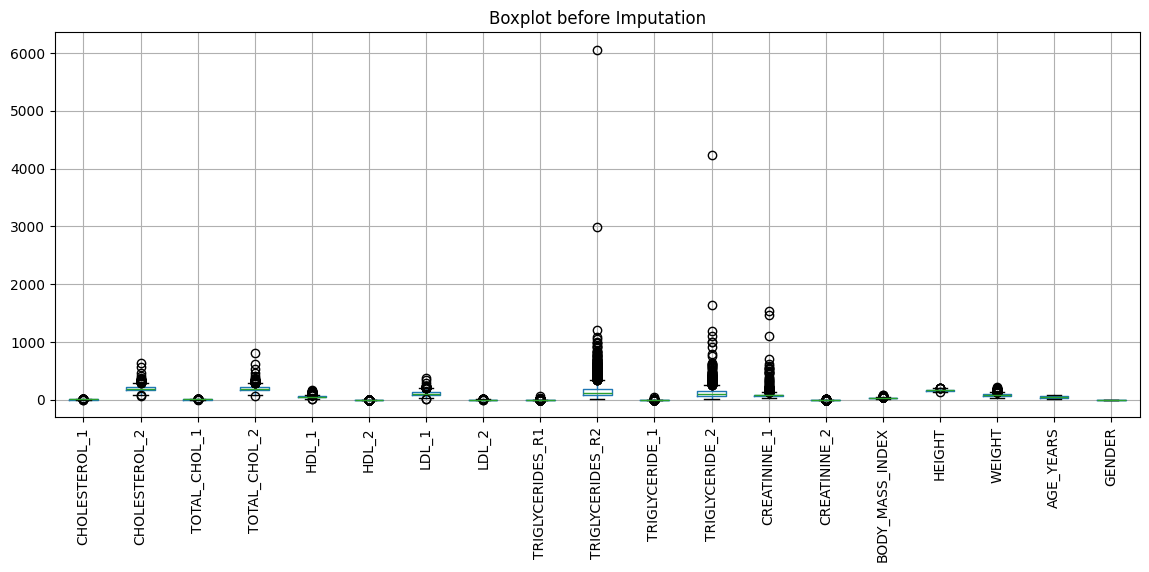

In [70]:
import matplotlib.pyplot as plt

df[bio_cols].boxplot(rot=90, figsize=(14,5))
plt.title("Boxplot before Imputation")
plt.show()

IterativeImputer feature from scikit-learn

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

imp_iter = IterativeImputer(random_state=42, max_iter=15, tol=1e-3)
df[bio_cols] = imp_iter.fit_transform(df[bio_cols])

Descriptive Statistics of Biomedical Variables

In [72]:
df[bio_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
CHOLESTEROL_1,5284.0,4.925574,1.084694,1.862,4.189000,4.836000,5.586000,16.525
CHOLESTEROL_2,5284.0,190.470321,41.944483,72.000,162.000000,187.000000,216.000000,639.000
TOTAL_CHOL_1,5284.0,4.892532,1.081889,1.780,4.160000,4.810000,5.530000,21.020
TOTAL_CHOL_2,5284.0,189.193036,41.834968,69.000,161.000000,186.000000,214.000000,813.000
HDL_1,5284.0,52.816238,16.070334,10.000,42.000000,50.000000,61.000000,173.000
HDL_2,5284.0,1.365910,0.415588,0.260,1.090000,1.290000,1.580000,4.470
LDL_1,5284.0,111.054552,24.166803,14.000,110.886179,111.044223,111.190552,375.000
LDL_2,5284.0,2.871870,0.624954,0.362,2.868282,2.871648,2.874728,9.698
TRIGLYCERIDES_R1,5284.0,1.729751,1.613554,0.226,0.903000,1.355000,2.100000,68.384
TRIGLYCERIDES_R2,5284.0,153.210396,142.918371,20.000,80.000000,120.000000,186.000000,6057.000


Box plot for outliers AFTER imputation

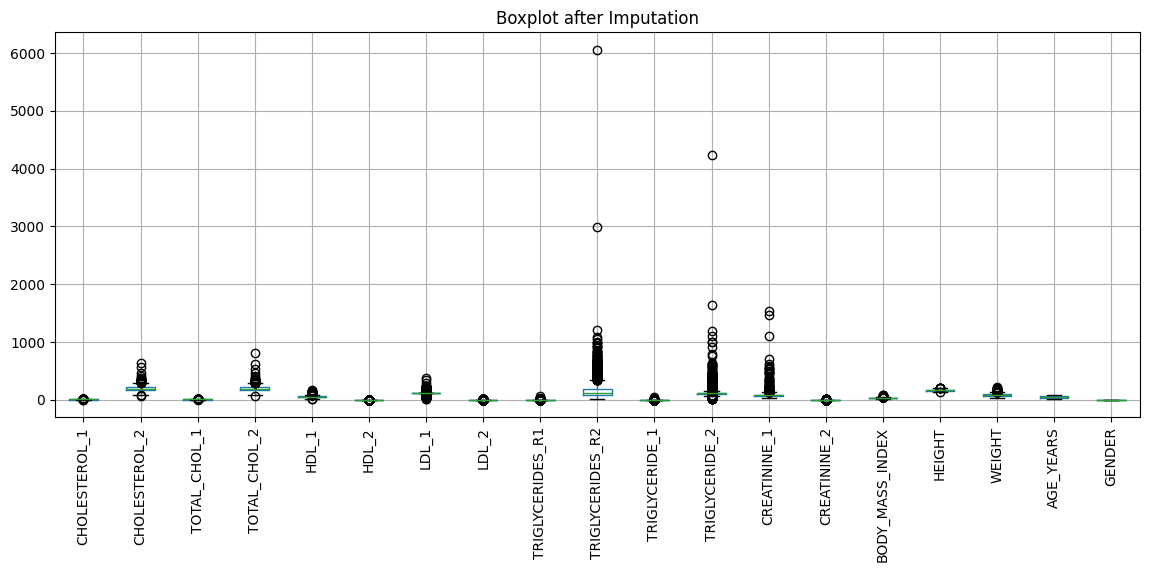

In [73]:
df[bio_cols].boxplot(rot=90, figsize=(14,5))
plt.title("Boxplot after Imputation")
plt.show()

In [74]:
basic_eda(df, "Merged after Imputation")
display(df.head(10))
null_summary(df, "Merged after Imputation")



===== Merged after Imputation =====
Shape: (5284, 35)
Columns: ['SEQN', 'GENDER', 'AGE_YEARS', 'AGE_MONTHS', 'BODY_MASS_INDEX', 'HEIGHT', 'WEIGHT', 'TOTAL_CHOL_1', 'TOTAL_CHOL_2', 'CHOLESTEROL_1', 'CREATININE_1', 'TRIGLYCERIDES_R1', 'CHOLESTEROL_2', 'CREATININE_2', 'TRIGLYCERIDES_R2', 'LDL_1', 'LDL_2', 'TRIGLYCERIDE_1', 'TRIGLYCERIDE_2', 'HDL_1', 'HDL_2', 'HYPERTENSION_1', 'HYPERTENSION_2', 'HIGH_CHOLESTEROL', 'HEART_FAILURE', 'CORO_HEART_DISEASE', 'ANGINA_PECTORIS', 'HEART_ATTACK', 'STROKE', 'HEART_FAILURE_AGE', 'CORO_HEART_DISEASE_AGE', 'ANGINA_PECTORIS_AGE', 'HEART_ATTACK_AGE', 'STROKE_AGE', 'HEART_ATTACK_RELATIVES']

Data type:
float64    33
int64       2
Name: count, dtype: int64


,SEQN,GENDER,AGE_YEARS,AGE_MONTHS,BODY_MASS_INDEX,HEIGHT,WEIGHT,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,...,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,69.0,828,26.7,171.3,78.3,4.32,167.0,4.344,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,0.0
1,73558,1.0,54.0,648,28.6,176.8,89.5,4.40,170.0,4.319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73559,1.0,72.0,864,28.9,175.3,88.9,3.26,126.0,3.284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73561,0.0,73.0,876,19.7,162.4,52.0,5.20,201.0,5.353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73562,1.0,56.0,672,41.7,158.7,105.0,5.84,226.0,5.948,...,1.0,0.0,1.0,0.0,0.0,54.0,0.0,55.0,0.0,0.0
5,73564,0.0,61.0,732,35.7,161.8,93.4,4.34,168.0,4.319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,73566,0.0,56.0,672,26.5,152.8,61.8,7.19,278.0,7.189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,73567,1.0,65.0,780,22.0,172.4,65.3,4.47,173.0,4.396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,73568,0.0,26.0,312,20.3,152.5,47.1,4.34,168.0,4.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,73571,1.0,76.0,912,34.4,172.5,102.4,4.32,167.0,4.060,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0



Dataset: Merged after Imputation


,Column,Nulls,Percent
0,SEQN,0,0.00
1,GENDER,0,0.00
2,AGE_YEARS,0,0.00
3,AGE_MONTHS,0,0.00
4,BODY_MASS_INDEX,0,0.00
5,HEIGHT,0,0.00
6,WEIGHT,0,0.00
7,TOTAL_CHOL_1,0,0.00
8,TOTAL_CHOL_2,0,0.00
9,CHOLESTEROL_1,0,0.00


In [75]:
print("Biomedical Variables after Imputation")
display(df[bio_cols].head(10))


Biomedical Variables after Imputation


,CHOLESTEROL_1,CHOLESTEROL_2,TOTAL_CHOL_1,TOTAL_CHOL_2,HDL_1,HDL_2,LDL_1,LDL_2,TRIGLYCERIDES_R1,TRIGLYCERIDES_R2,TRIGLYCERIDE_1,TRIGLYCERIDE_2,CREATININE_1,CREATININE_2,BODY_MASS_INDEX,HEIGHT,WEIGHT,AGE_YEARS,GENDER
0,4.344,168.0,4.32,167.0,65.0,1.68,110.987705,2.870456,1.581,140.0,1.362802,120.704666,106.96,1.21,26.7,171.3,78.3,69.0,1.0
1,4.319,167.0,4.40,170.0,50.0,1.29,111.022875,2.871203,2.902,257.0,1.362801,120.704466,69.84,0.79,28.6,176.8,89.5,54.0,1.0
2,3.284,127.0,3.26,126.0,60.0,1.55,56.000000,1.448000,0.576,51.0,0.576000,51.000000,107.85,1.22,28.9,175.3,88.9,72.0,1.0
3,5.353,207.0,5.20,201.0,85.0,2.20,101.000000,2.612000,0.994,88.0,0.847000,75.000000,64.53,0.73,19.7,162.4,52.0,73.0,0.0
4,5.948,230.0,5.84,226.0,38.0,0.98,111.156586,2.873989,3.692,327.0,1.362755,120.705378,78.68,0.89,41.7,158.7,105.0,56.0,1.0
5,4.319,167.0,4.34,168.0,58.0,1.50,97.000000,2.508000,0.768,68.0,0.723000,64.000000,81.33,0.92,35.7,161.8,93.4,61.0,0.0
6,7.189,278.0,7.19,278.0,59.0,1.53,111.216152,2.875259,2.958,262.0,1.362721,120.705999,48.62,0.55,26.5,152.8,61.8,56.0,0.0
7,4.396,170.0,4.47,173.0,79.0,2.04,110.972171,2.870130,0.440,39.0,1.362802,120.705618,85.75,0.97,22.0,172.4,65.3,65.0,1.0
8,4.500,174.0,4.34,168.0,96.0,2.48,67.000000,1.733000,0.350,31.0,0.271000,24.000000,65.42,0.74,20.3,152.5,47.1,26.0,0.0
9,4.060,157.0,4.32,167.0,50.0,1.29,111.017676,2.871075,3.206,284.0,1.362815,120.706234,105.20,1.19,34.4,172.5,102.4,76.0,1.0


### Remove rows with missing disease values & drop column HYPERTENSION_2

In [89]:
binary_disease_cols = [
    "HYPERTENSION_1", "HIGH_CHOLESTEROL", "HEART_FAILURE", "CORO_HEART_DISEASE",
    "ANGINA_PECTORIS", "HEART_ATTACK", "STROKE"
]

In [90]:
df_clean = df.dropna(subset=binary_disease_cols)

In [91]:
df_clean = df_clean.drop(columns=['HYPERTENSION_2'])

In [92]:
basic_eda(df_clean, "Clean DF")
display(df_clean.head(10))
null_summary(df_clean, "Clean DF")


===== Clean DF =====
Shape: (5214, 34)
Columns: ['SEQN', 'GENDER', 'AGE_YEARS', 'AGE_MONTHS', 'BODY_MASS_INDEX', 'HEIGHT', 'WEIGHT', 'TOTAL_CHOL_1', 'TOTAL_CHOL_2', 'CHOLESTEROL_1', 'CREATININE_1', 'TRIGLYCERIDES_R1', 'CHOLESTEROL_2', 'CREATININE_2', 'TRIGLYCERIDES_R2', 'LDL_1', 'LDL_2', 'TRIGLYCERIDE_1', 'TRIGLYCERIDE_2', 'HDL_1', 'HDL_2', 'HYPERTENSION_1', 'HIGH_CHOLESTEROL', 'HEART_FAILURE', 'CORO_HEART_DISEASE', 'ANGINA_PECTORIS', 'HEART_ATTACK', 'STROKE', 'HEART_FAILURE_AGE', 'CORO_HEART_DISEASE_AGE', 'ANGINA_PECTORIS_AGE', 'HEART_ATTACK_AGE', 'STROKE_AGE', 'HEART_ATTACK_RELATIVES']

Data type:
float64    32
int64       2
Name: count, dtype: int64


,SEQN,GENDER,AGE_YEARS,AGE_MONTHS,BODY_MASS_INDEX,HEIGHT,WEIGHT,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,...,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,69.0,828,26.7,171.3,78.3,4.32,167.0,4.344,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,0.0
1,73558,1.0,54.0,648,28.6,176.8,89.5,4.40,170.0,4.319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73559,1.0,72.0,864,28.9,175.3,88.9,3.26,126.0,3.284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73561,0.0,73.0,876,19.7,162.4,52.0,5.20,201.0,5.353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73562,1.0,56.0,672,41.7,158.7,105.0,5.84,226.0,5.948,...,1.0,0.0,1.0,0.0,0.0,54.0,0.0,55.0,0.0,0.0
5,73564,0.0,61.0,732,35.7,161.8,93.4,4.34,168.0,4.319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,73566,0.0,56.0,672,26.5,152.8,61.8,7.19,278.0,7.189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,73567,1.0,65.0,780,22.0,172.4,65.3,4.47,173.0,4.396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,73568,0.0,26.0,312,20.3,152.5,47.1,4.34,168.0,4.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,73571,1.0,76.0,912,34.4,172.5,102.4,4.32,167.0,4.060,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0



Dataset: Clean DF


,Column,Nulls,Percent
0,SEQN,0,0.0
1,GENDER,0,0.0
2,AGE_YEARS,0,0.0
3,AGE_MONTHS,0,0.0
4,BODY_MASS_INDEX,0,0.0
5,HEIGHT,0,0.0
6,WEIGHT,0,0.0
7,TOTAL_CHOL_1,0,0.0
8,TOTAL_CHOL_2,0,0.0
9,CHOLESTEROL_1,0,0.0
